In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [62]:
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [63]:
df=zoo.drop(['animal name'],axis=1)
array=df.values

In [64]:
x=array[:,1:]
y=array[:,0]

In [65]:

knn=KNeighborsClassifier(n_neighbors=1)
kfold=KFold(n_splits=10, shuffle=True, random_state=50)
result=cross_val_score(knn,x,y,cv=kfold)
result.mean()

0.9418181818181818

In [66]:
n_neighbors=np.array(range(1,100))
param=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [67]:
print(grid.best_score_)
print(grid.best_params_)

0.9400000000000001
{'n_neighbors': 1}


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
k_rang=range(len(array))
k_score=[]
for k in k_rang :
        knn=KNeighborsClassifier(n_neighbors=k)
        score=cross_val_score(knn,x,y, cv=5)
        k_score.append(score.mean())
    

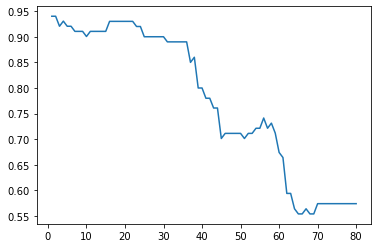

In [69]:
plt.plot(k_rang,k_score)

### Visualisation Hairs or Not

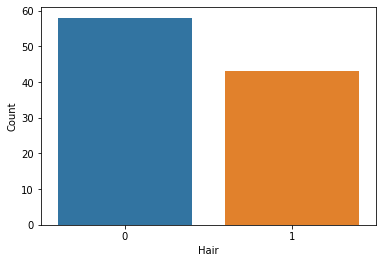

0    58
1    43
Name: hair, dtype: int64

In [70]:
sns.countplot(x="hair", data=df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
df.loc[:,'hair'].value_counts()

In [99]:

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=100)


In [86]:
k_range = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_range) :
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    


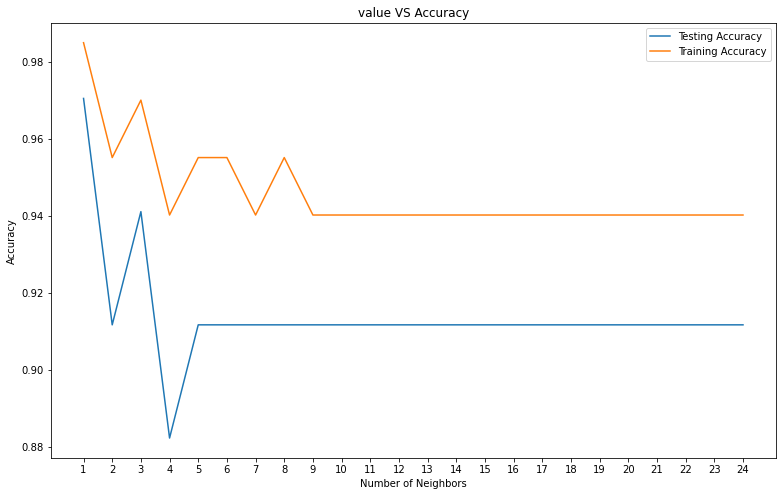

Best accuracy is 0.9705882352941176 with K = 1


In [89]:
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


In [95]:
model = LogisticRegression(max_iter=400)
cv_result = cross_val_score(model,x,y,cv=k)
print("CV Scores: ",cv_result)
print("CV Average: ",np.sum(cv_result)/k)

CV Scores:  [1.   1.   1.   1.   1.   1.   1.   1.   0.75 0.75 1.   1.   0.75 1.
 1.   1.   0.75 0.75 1.   1.   1.   1.   0.75 1.  ]
CV Average:  0.9375


In [103]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = df.loc[:,df.columns != "hair"], df.loc[:,"hair"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1 )
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
print("Confisuon Matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confisuon Matrix: 
 [[15  0]
 [ 0 16]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



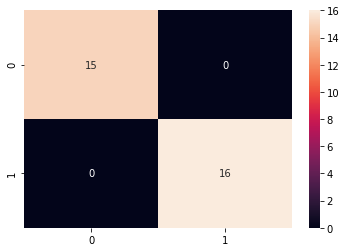

In [106]:
sns.heatmap(cm,annot=True,fmt="g")
plt.show()